<a href="https://colab.research.google.com/github/KChittaranjan/airbnb-data-analysis/blob/main/AirBnB_Capstone_Project_Chittaranjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project/Airbnb NYC 2019.csv'

df = pd.read_csv(file_path)

Let us observe different columns and their types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


This is quite a large data set having wide range of features... we'll first see if columns are having appropriate data types 

The only column with inopropriate data type is last_review and availability_365 remaining all are fine

In [ ]:
#parsing the last review from object to date
df['last_review'] = pd.to_datetime(df['last_review'])
df['availability_365'] = pd.to_timedelta(df['availability_365'])

In [ ]:
#number of null values in each column
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Columns with null values are name , host_name , last_review and reviews_per_month 
In these we'll use **name** to do analysis as it describes the room and contains valueble info about room , **host_name** we don't need at all as it doesn't add any relevance to the analysis , and next **last_review** and **reviews_per_month** have large number of null values we'll check the reason as to why.

In [ ]:
#dropping rows with no name
df = df[~df['name'].isna()]
#dropping the entire column of host_name as it is insignificant
df.drop('host_name',axis=1 , inplace=True)

In [ ]:
#observing data with last_review as null
df[df['last_review'].isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,0 days 00:00:00.000000365
19,7750,Huge 2 BR Upper East Cental Park,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,0 days 00:00:00.000000249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0 days 00:00:00
36,11452,Clean and Quiet in Brooklyn,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,0 days 00:00:00.000000365
38,11943,Country space in the city,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,0 days 00:00:00.000000365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,0 days 00:00:00.000000009
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,0 days 00:00:00.000000036
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,0 days 00:00:00.000000027
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,0 days 00:00:00.000000002


We can see in the data that last_month and number_of_reviews are na when number_of_reviews are 0 , so it makes sence we just need to assign them appropriate values
1)**number_of_reviews** we'll assign this to 0 as total number of reviews  are 0
2)**last_reviews** we'll assign NA to this as we wo'nt be using this column for most of the analysis except for the analysis that are based on the availability of listing or if it is active now same goes with **availability_365** we'll use this to answer questions on how busy a host is ,when we are doing those analysis we'll remove rows with null values as those contains large chunk of rows and it doesn't make sense to remove them when we don't need these features



In [ ]:
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna('NA',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              48879 non-null  int64          
 1   name                            48879 non-null  object         
 2   host_id                         48879 non-null  int64          
 3   neighbourhood_group             48879 non-null  object         
 4   neighbourhood                   48879 non-null  object         
 5   latitude                        48879 non-null  float64        
 6   longitude                       48879 non-null  float64        
 7   room_type                       48879 non-null  object         
 8   price                           48879 non-null  int64          
 9   minimum_nights                  48879 non-null  int64          
 10  number_of_reviews               48879 non-null  int64     

We can proceed as there are no null values now


# Data types
We'll devide the data into the types 


1.   Categorical - id , name , host_id , neighbourhood_group , neighbourhood , room_type 
2.   Numerical - price , minimum_nights , number_of_reviews , reviews_per_month,calculated_host_listings_count,availability_365, latitude , longitude 



We'll explore numerical data types first as they might contain outliers

count    48879.000000
mean       152.722355
std        240.186804
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Text(0.5, 0, 'Price')

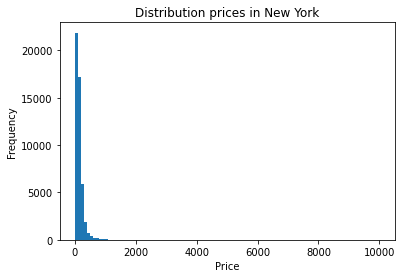

In [ ]:
#statistical distribution and graph of prices
print(df['price'].describe())
df['price'].plot.hist(bins=100)
plt.title('Distribution prices in New York')
plt.xlabel('Price')

As we can see from graph and describe most of the price is below 1000 so we'll only consider that

In [ ]:
df = df[df['price'] < 1000]

Text(0.5, 0, 'Price')

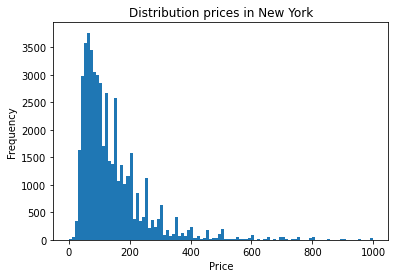

In [ ]:
#distribution of new values of new value
df['price'].plot.hist(bins=100)
plt.title('Distribution prices in New York')
plt.xlabel('Price')

There are still some outliers but we'll consider them as to allow for how expensive rents can be in new york

count    48581.000000
mean         6.955950
std         19.771551
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


Text(0.5, 0, 'minimum_nights')

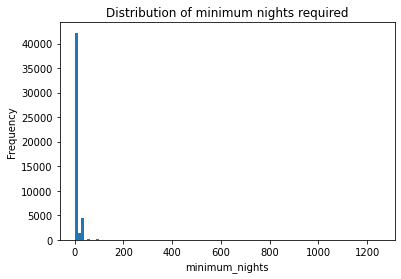

In [ ]:
#statistical distribution and graph of prices
print(df['minimum_nights'].describe())
df['minimum_nights'].plot.hist(bins=100)
plt.title('Distribution of minimum nights required')
plt.xlabel('minimum_nights')

We can see that most of the data is less than 10 but there is peak somewhere around 50 

We'll check below what most of the values lie

In [ ]:
#extreme outliers
df['minimum_nights'].quantile(0.98)

30.0

We'll consider listings below this(31 days) as this is 1 month which some hosts prefer 

In [ ]:
#removing rows which are having minimum required nights as below 31
df = df[df['minimum_nights'] <= 30]

Text(0.5, 0, 'minimum_nights')

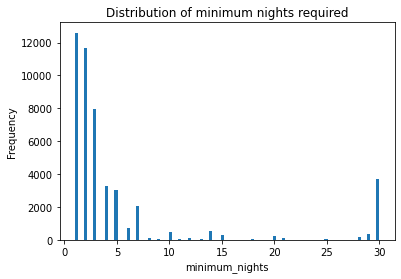

In [ ]:
df['minimum_nights'].plot.hist(bins=100)
plt.title('Distribution of minimum nights required')
plt.xlabel('minimum_nights')

Yes this is as we speculated most of the values are skewed to 0 and there are some at 30

Now let us see categorical columns

Let us create segregate our data into unique values of each of the category one by one


1.  neighbourhood
2.  type_of_room
3.  neighbourhood_groups
4.  host_id





In [ ]:
def get_neighbourhood(row):
  '''this function returns the list of neighbourhood'''
  return list(set(list(df.loc[df['neighbourhood_group'] == row,'neighbourhood'])))

def get_room_destribution(row):
  '''this function returns thepercentages of different room types'''

  temp = df[df['neighbourhood_group']== row].groupby('room_type')['id'].count().reset_index()
  
  temp['number_of_listings'] = (df.groupby('room_type')['id'].count().reset_index())['id']
  
  temp['id'] = temp['id'].div(temp['number_of_listings'].values,axis=0)
  
  temp.drop('number_of_listings',axis =1,inplace=True)
  temp['id'] = temp['id'].apply(lambda row: round(row*100,0))
  temp.sort_values('id',ascending=False,inplace=True)
  return temp.set_index('room_type').to_dict()['id']

In [ ]:
#creating data frame to store the data segregated into neighbourhood
neighbourhood_df = (df.groupby('neighbourhood_group')['id'].count().reset_index().sort_values('id',ascending=False).rename(columns={'id':'number_of_listings'}))
neighbourhood_df['percentage'] = neighbourhood_df['number_of_listings'].apply(lambda row: round(row*100/df['id'].count(),2))
neighbourhood_df['number_of_reviews'] = (df.groupby('neighbourhood_group')['number_of_reviews'].median().reset_index())['number_of_reviews']
neighbourhood_df['reviews_per_month'] = (df.groupby('neighbourhood_group')['reviews_per_month'].median().reset_index())['reviews_per_month']
neighbourhood_df['average_rice'] = (df.groupby('neighbourhood_group')['price'].median().reset_index())['price']
neighbourhood_df['standard_deviation'] = (df.groupby('neighbourhood_group')['price'].std().reset_index())['price']
neighbourhood_df['neighbourhoods'] = neighbourhood_df['neighbourhood_group'].apply(get_neighbourhood)
neighbourhood_df['room_distribution'] = neighbourhood_df['neighbourhood_group'].apply(get_room_destribution)

In [ ]:
neighbourhood_df

,neighbourhood_group,number_of_listings,percentage,number_of_reviews,reviews_per_month,average_rice,standard_deviation,neighbourhoods,room_distribution
2,Manhattan,21034,43.95,4.0,0.30,149,129.569956,"[Lower East Side, Upper West Side, East Harlem...","{'Entire home/apt': 51.0, 'Shared room': 41.0,..."
1,Brooklyn,19787,41.34,6.0,0.39,90,91.849133,"[Sunset Park, Flatbush, Columbia St, East Flat...","{'Private room': 45.0, 'Entire home/apt': 38.0..."
3,Queens,5601,11.70,8.0,0.78,75,71.683417,"[Kew Gardens, College Point, Ridgewood, Nepons...","{'Shared room': 17.0, 'Private room': 15.0, 'E..."
0,Bronx,1075,2.25,9.0,0.94,65,73.074972,"[Spuyten Duyvil, Morris Heights, Fieldston, So...","{'Shared room': 5.0, 'Private room': 3.0, 'Ent..."
4,Staten Island,366,0.76,12.5,1.00,75,84.383590,"[Graniteville, Prince's Bay, Clifton, Midland ...","{'Entire home/apt': 1.0, 'Private room': 1.0, ..."


In [ ]:
c = neighbourhood_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
so

number_of_reviews   standard_deviation    0.674535
standard_deviation  number_of_reviews     0.674535
average_rice        number_of_reviews     0.757562
number_of_reviews   average_rice          0.757562
number_of_listings  standard_deviation    0.777388
standard_deviation  number_of_listings    0.777388
                    percentage            0.777414
percentage          standard_deviation    0.777414
reviews_per_month   standard_deviation    0.783348
standard_deviation  reviews_per_month     0.783348
number_of_listings  average_rice          0.796635
average_rice        number_of_listings    0.796635
percentage          average_rice          0.796666
average_rice        percentage            0.796666
reviews_per_month   average_rice          0.816889
average_rice        reviews_per_month     0.816889
number_of_reviews   number_of_listings    0.895775
number_of_listings  number_of_reviews     0.895775
number_of_reviews   percentage            0.895832
percentage          number_of_r

W'll consider prices ranging from 0 too 700 to better destinguish the price ranges in map using legend

In [ ]:
df2 = df[df['price'] < 700]

Text(0.5, 1.0, 'Rental Prices in NYC')

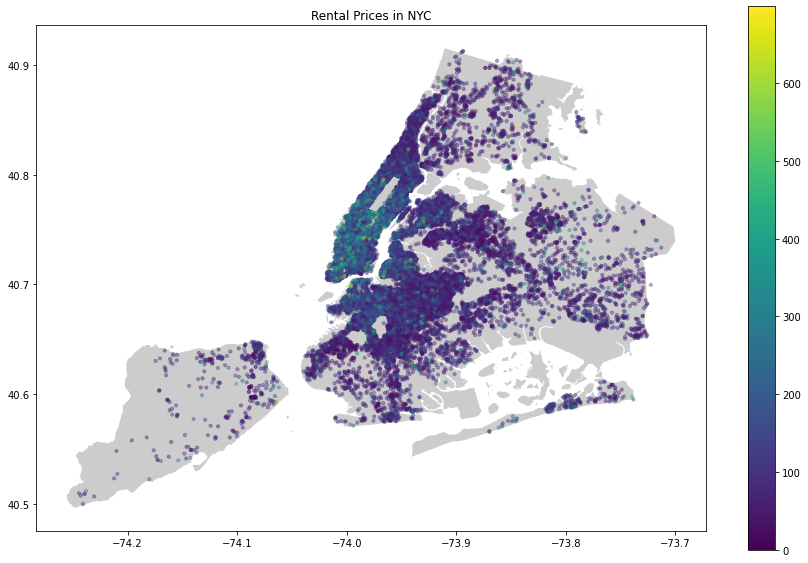

In [ ]:
street_map = gpd.read_file('/content/drive/MyDrive/Boundaries/Borough Boundaries.zip (Unzipped Files)/geo_export_dbd0e1ff-776d-4f46-9c1f-42844dbaa345.shp')
goemetry = [Point(xy) for xy in zip(df2['longitude'],df2['latitude'])]


geo_df = gpd.GeoDataFrame(df2,geometry = goemetry)

fig,ax = plt.subplots(figsize = (15,10))

street_map.plot(ax = ax ,alpha = 0.4,color='grey' )
geo_df.plot(column='price',ax = ax , alpha = 0.4 , legend = True , markersize = 10)
plt.title('Rental Prices in NYC')



From graph we can see that most of the listings are clustered in Manhatten and brooklyn even though they are smaller in size and their prizes are also high this is due to the fact that these areas have the most notable places in newyork

Text(0.5, 0, 'Neighbourhood`')

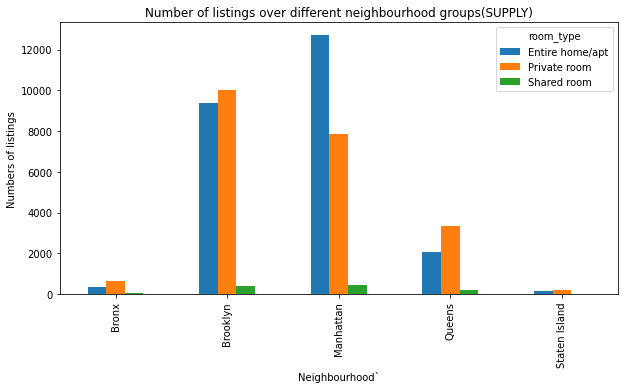

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack().plot(kind="bar")
plt.title('Number of listings over different neighbourhood groups(SUPPLY)')
plt.ylabel('Numbers of listings')
plt.xlabel('Neighbourhood`')

Text(0.5, 0, 'Neighbourhood`')

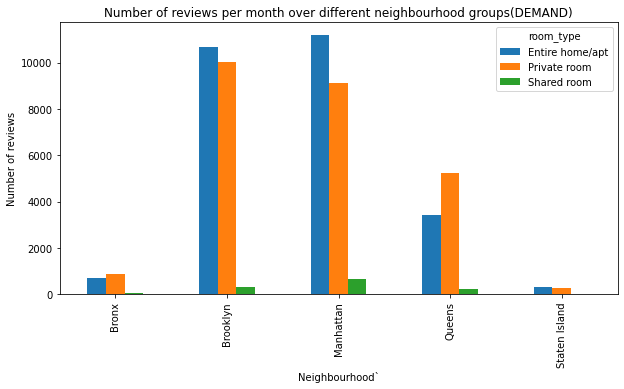

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df[~df['reviews_per_month'].isna()].groupby(['neighbourhood_group','room_type'])['reviews_per_month'].sum().unstack().plot(kind="bar")
plt.title('Number of reviews per month over different neighbourhood groups(DEMAND)')
plt.ylabel('Number of reviews')
plt.xlabel('Neighbourhood`')

From the above two graphs we can see that the demand and supply are inline for almost all except for home/apartment in brooklyn so there hosts can increase the listings

Text(0.5, 0, 'Neighbourhood`')

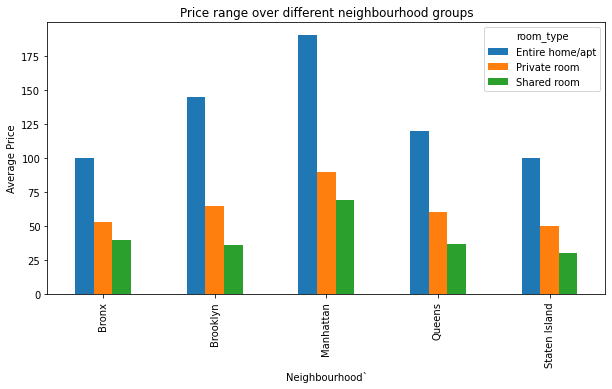

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['neighbourhood_group','room_type'])['price'].median().unstack().plot(kind="bar")
plt.title('Price range over different neighbourhood groups')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood`')

Text(0.5, 1.0, 'Percentage of listings accross New York neighbourhoods')

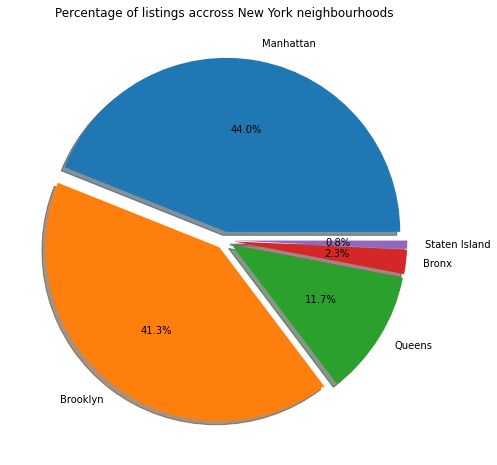

In [ ]:
#matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = (8,8)

#plotting
plt.pie(neighbourhood_df['percentage'], labels=neighbourhood_df['neighbourhood_group'],  explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True)

#labeling
plt.title('Percentage of listings accross New York neighbourhoods')

From above two figures we can see that maximum number of listings are there
in Manhattan and brooklyn and it isn't coincident these two have the appropriate distribution of room types

In [ ]:
def getfrequency(row):
  '''get the distribution of different neighbourhoods for a perticular minimum nights'''

  temp = df[df['minimum_nights']== row].groupby('neighbourhood_group')['id'].count().reset_index()
  
  temp['number_of_listings'] = (df.groupby('neighbourhood_group')['id'].count().reset_index())['id']
  
  temp['id'] = temp['id'].div(temp['number_of_listings'].values,axis=0)
  
  temp.drop('number_of_listings',axis =1,inplace=True)
  temp['id'] = temp['id'].apply(lambda row: round(row*100,0))
  temp.sort_values('id',ascending=False,inplace=True)
  return temp.set_index('neighbourhood_group').to_dict()['id']

In [ ]:
#minimum nights df having different features
minimum_nights_df = df.groupby('minimum_nights')['reviews_per_month'].sum().reset_index()
minimum_nights_df['number_of_listings'] = (df.groupby('minimum_nights')['id'].count().reset_index())['id']
minimum_nights_df['price'] = (df.groupby('minimum_nights')['price'].median().reset_index())['price']
minimum_nights_df['number_of_reviews'] = (df.groupby('minimum_nights')['number_of_reviews'].sum().reset_index())['number_of_reviews']
minimum_nights_df['neighbourhood_groups'] = minimum_nights_df['minimum_nights'].apply(getfrequency )
minimum_nights_df

,minimum_nights,reviews_per_month,number_of_listings,price,number_of_reviews,neighbourhood_groups
0,1,20371.90,12590,90.0,370339,"{'Queens': 39.0, 'Bronx': 33.0, 'Staten Island..."
1,2,16408.37,11658,110.0,349072,"{'Bronx': 33.0, 'Staten Island': 33.0, 'Brookl..."
2,3,8332.46,7967,120.0,207258,"{'Brooklyn': 18.0, 'Bronx': 17.0, 'Manhattan':..."
3,4,2732.19,3289,125.0,71500,"{'Staten Island': 12.0, 'Brooklyn': 7.0, 'Manh..."
4,5,1947.49,3023,120.0,49197,"{'Brooklyn': 7.0, 'Manhattan': 6.0, 'Bronx': 5..."
5,6,421.11,747,120.0,10169,"{'Brooklyn': 2.0, 'Manhattan': 2.0, 'Bronx': 1..."
6,7,802.83,2045,100.0,18994,"{'Brooklyn': 5.0, 'Manhattan': 4.0, 'Queens': ..."
7,8,50.67,130,99.5,1229,"{'Brooklyn': 6.0, 'Manhattan': 0.0, 'Queens': ..."
8,9,27.93,80,109.5,597,"{'Brooklyn': 4.0, 'Manhattan': 0.0, 'Queens': ..."
9,10,137.04,480,99.0,3757,"{'Brooklyn': 1.0, 'Manhattan': 1.0, 'Queens': ..."


# **Conclusions**

*   Queens and Bronx have majority of listings having minimum number of nights required as 1.
*   The number of listings gets sudden jump as we move from 1 at certain minimum number of nights values like 7,10,14 and 30.
*  Manhattan has the heighest percentage minimum nights as 30 days as it is more in demand

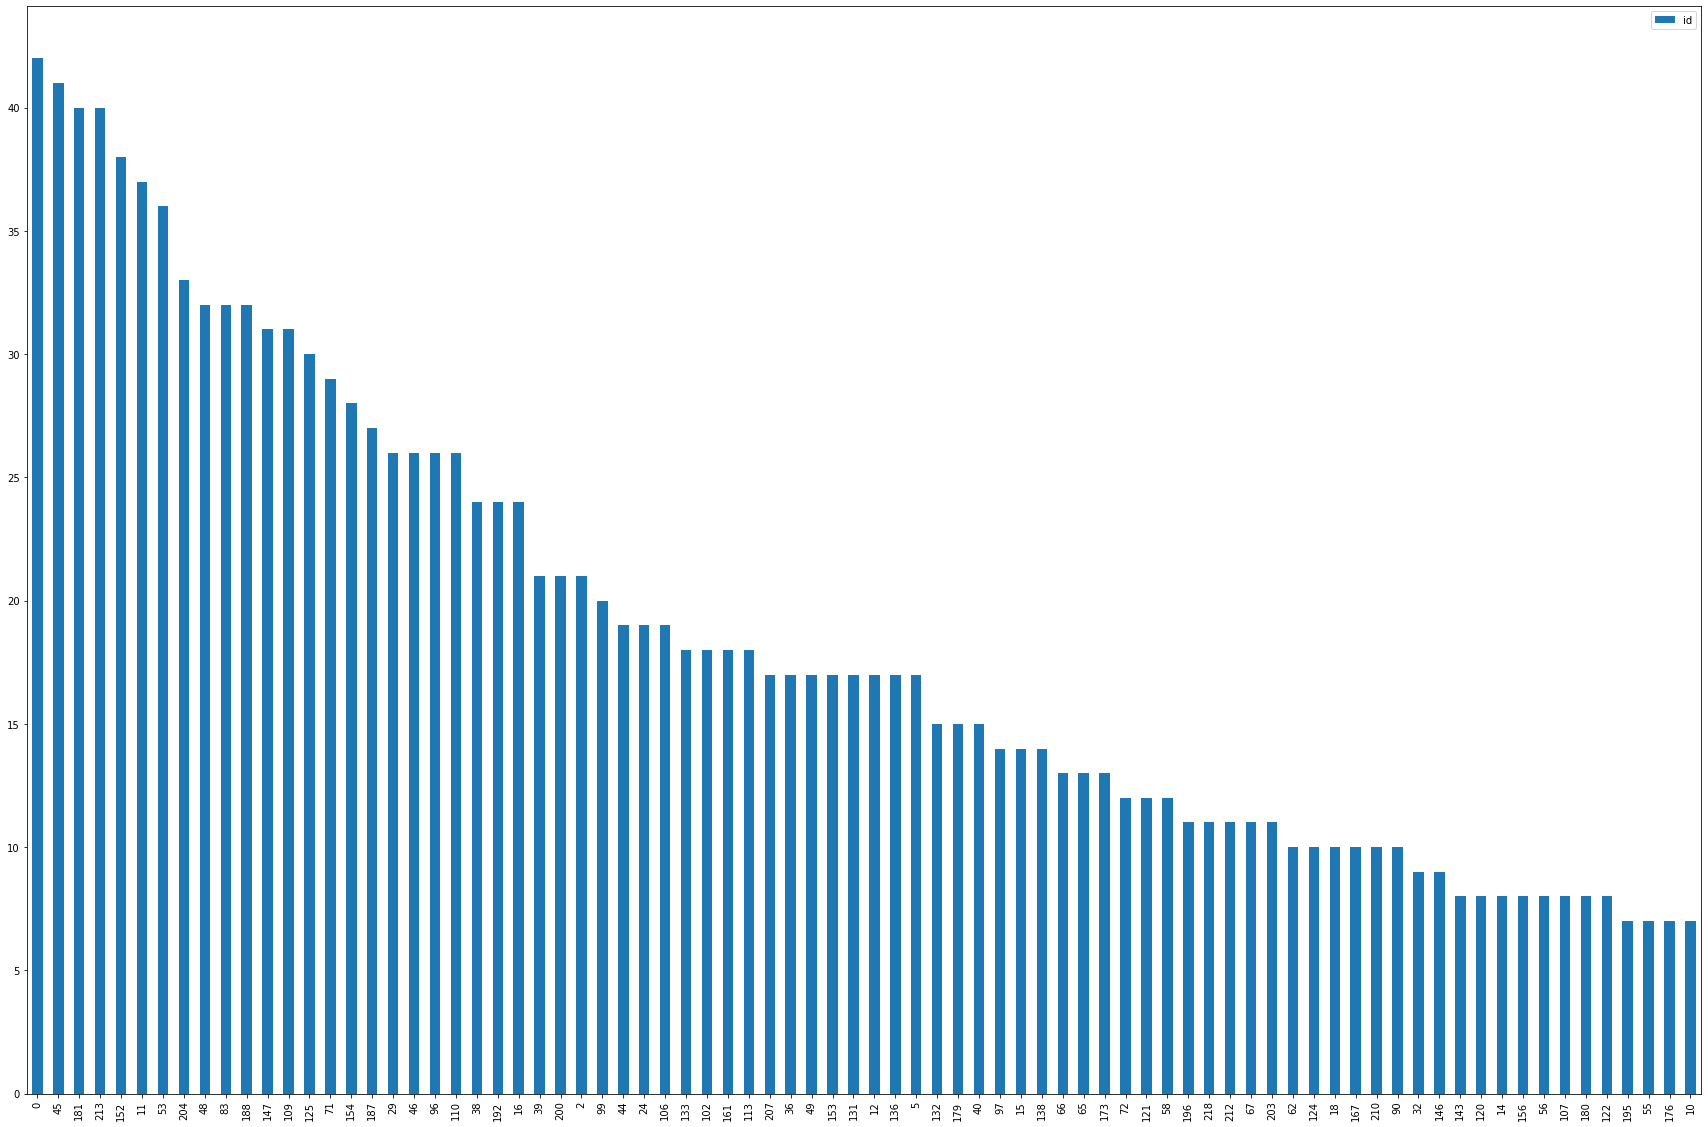

In [ ]:
plt.rcParams['figure.figsize'] = (30,20)

df.groupby('neighbourhood')['id'].count().reset_index().sort_values('id',ascending=False).loc[0:10,:].plot(kind = 'bar')


-0.9963989016673592


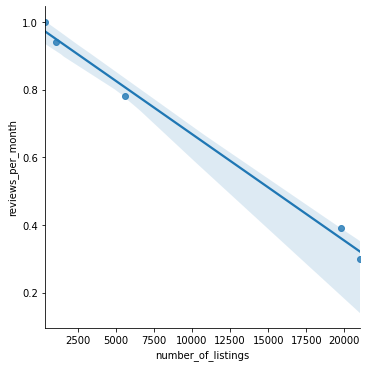

In [ ]:
corr1 = neighbourhood_df['number_of_listings'].corr(neighbourhood_df['reviews_per_month'])
print(corr1)
sns.lmplot(x='number_of_listings', y = 'reviews_per_month', data= neighbourhood_df )

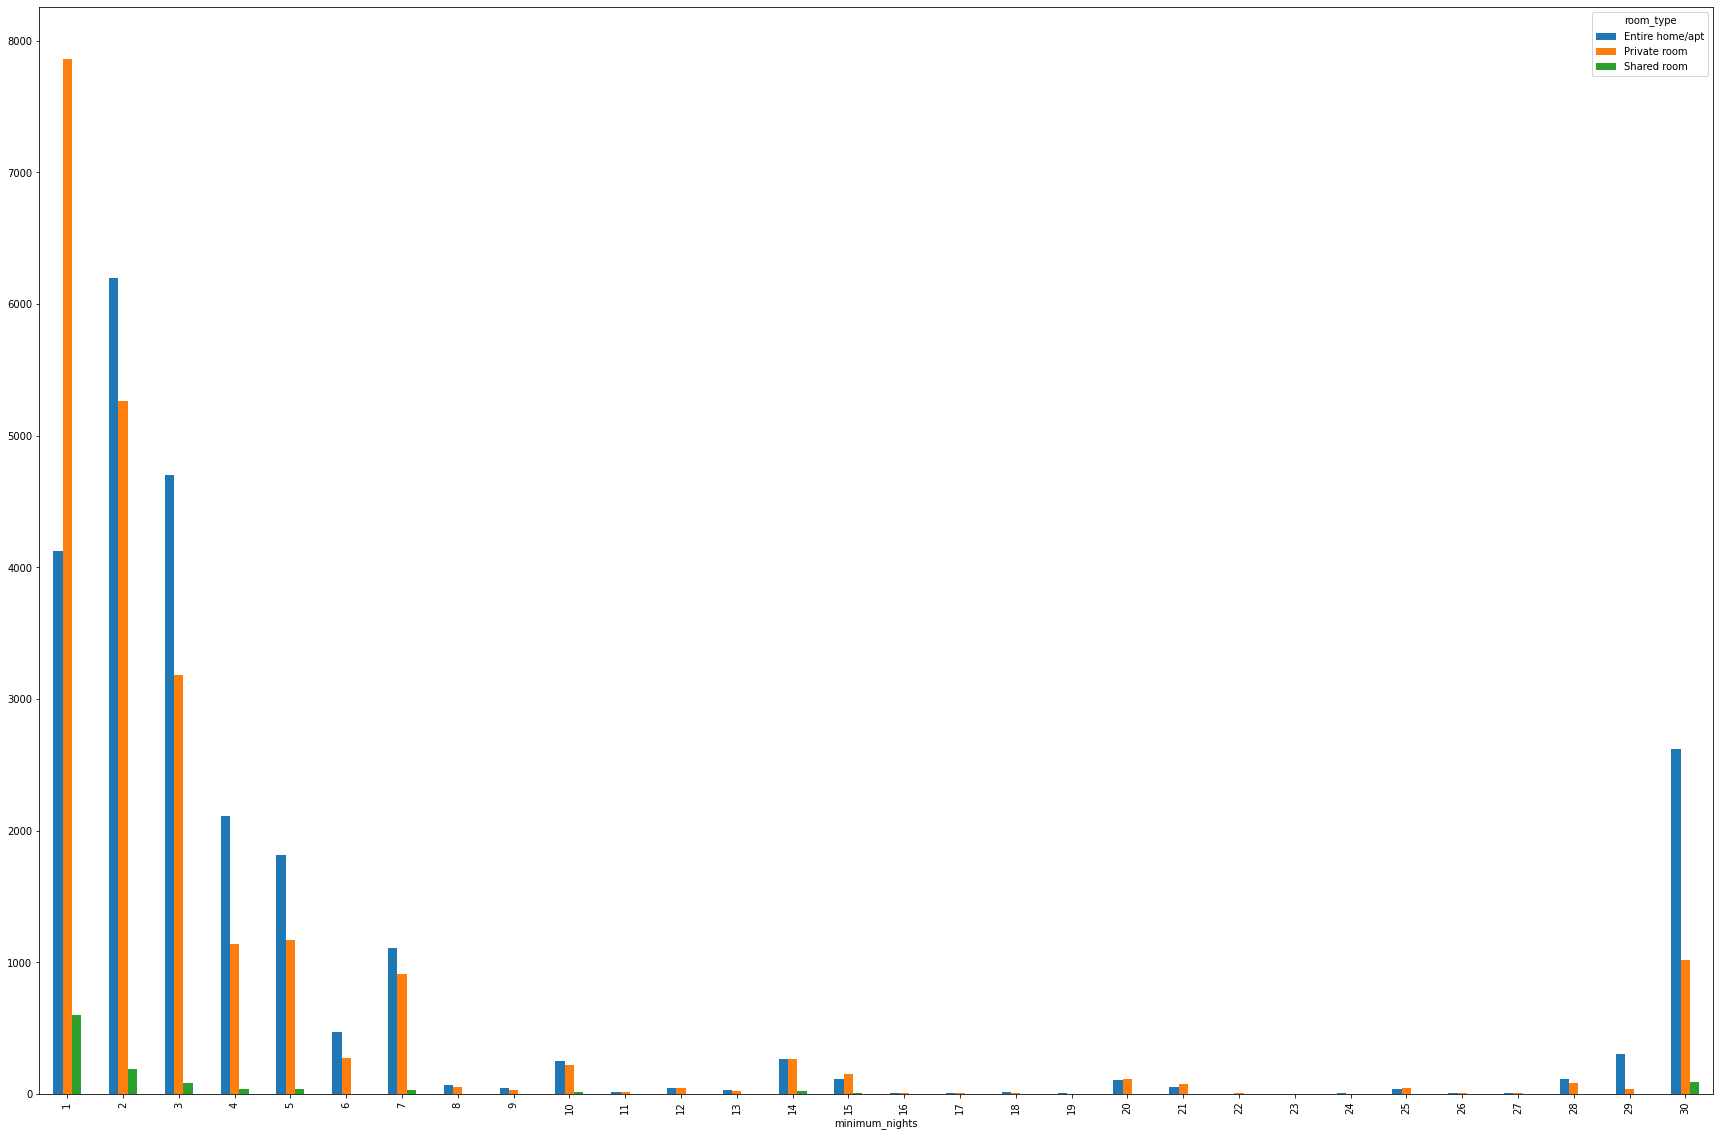

In [ ]:
df.groupby(['minimum_nights','room_type'])['id'].count().unstack().plot(kind="bar")
plt.title('Frequency of number of rooms different backgrounds')

We can see in the graph that almost all of the listings are having minimum nights below 1 with righskewness (towards 1) and there's a peak at 30 days which are the listings that rent on montly basis targeting the market of long term staying users

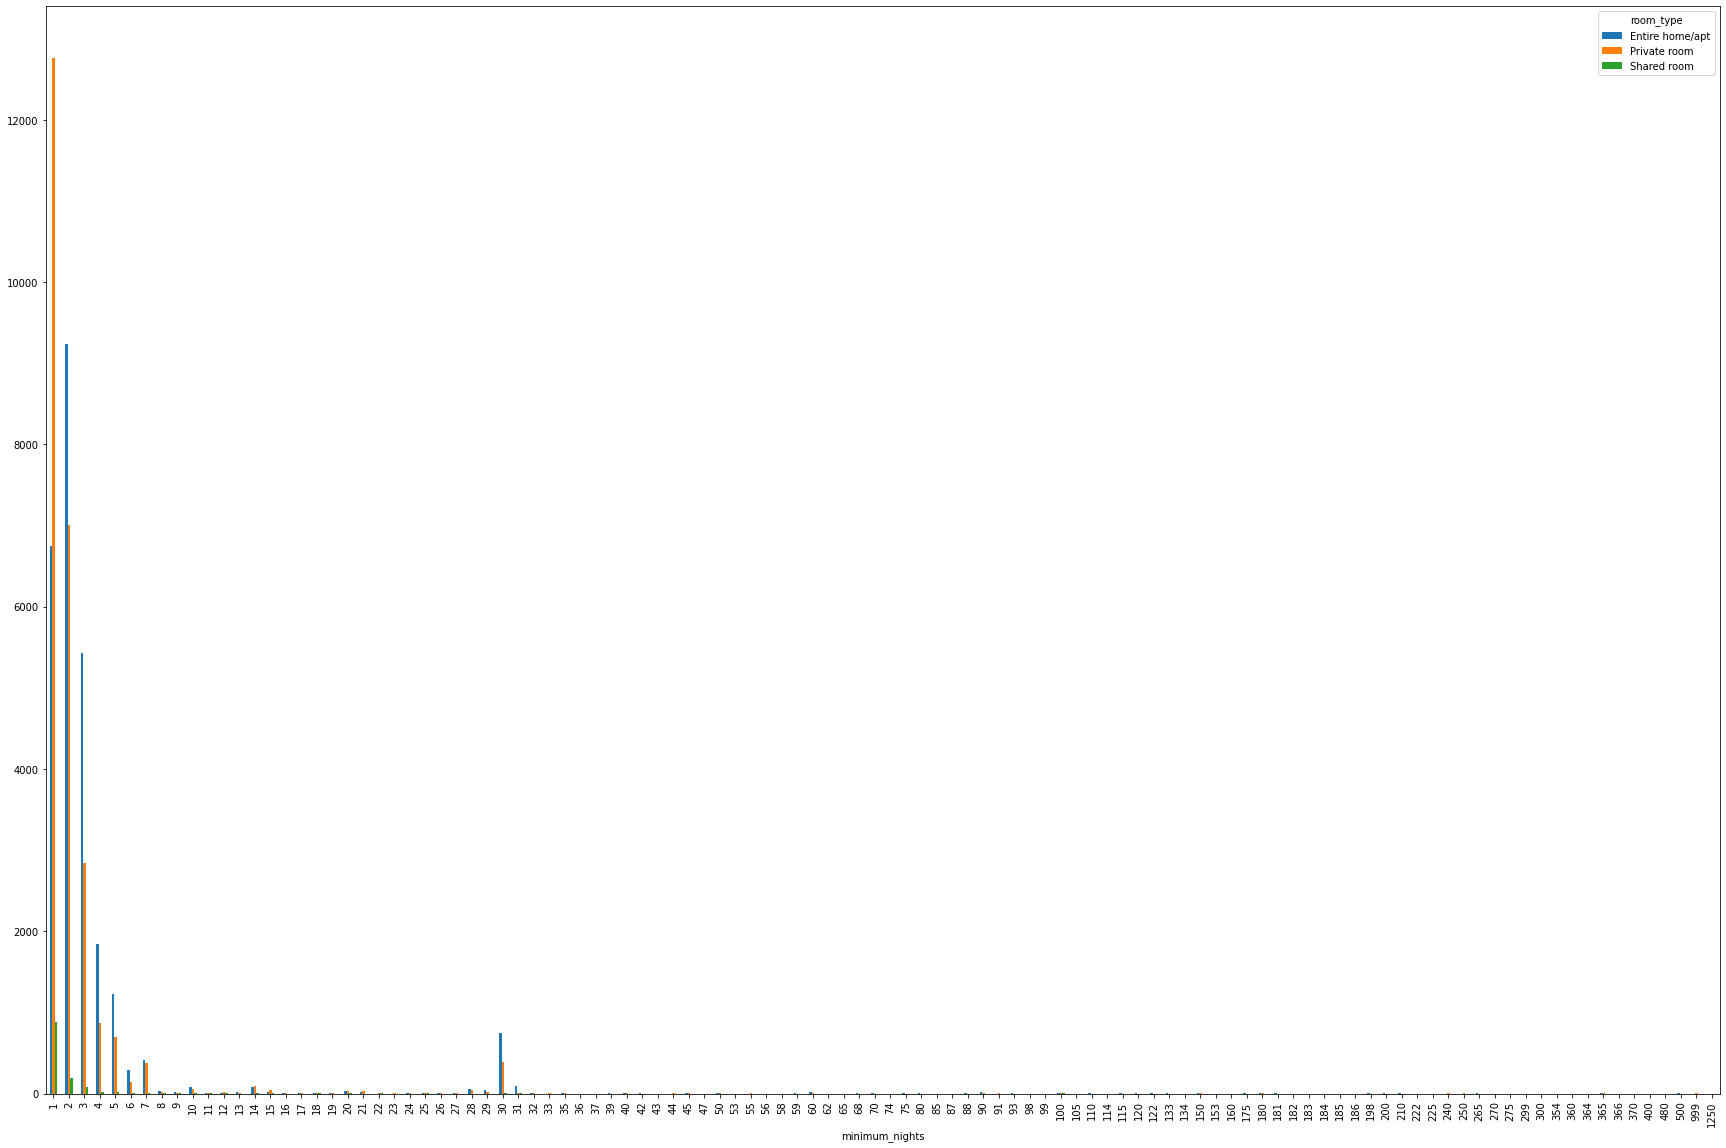

In [ ]:
df.groupby(['minimum_nights','room_type'])['reviews_per_month'].sum().unstack().plot(kind="bar")

We can see in the graph that most of the listings with one day minimum requirement are private/single which targets the users who comes on business meetings and such,and as the number of nights are increasing entire home is becomming higher as they target the users who come with friends/family to probably explore the city

Let us see the top words that are used in the names of top listings (based on number of reviews

In [ ]:

stops = ['it','in','and','a','the','with','of','&','1','2','3','to','w','from','for','+','on','|','by','One']

words = {}
for name in df.sort_values('number_of_reviews',ascending=False)['name'][0:500]:
  for item in name.replace("["," ").replace(',',' ').replace('.',' ').replace('!',' ').replace(':',' ').replace('?',' ').replace('@',' ').replace('-',' ').replace('{',' ').replace('}',' ').replace('/',' ').split():
    if item.lower() not in stops:


      words[item.lower()] = words.get(item.lower(),0) + 1

words = {k: words[k] for k in sorted(words, key=words.get, reverse=True)}

print(words)


{'room': 128, 'private': 111, 'apt': 53, 'near': 51, 'bedroom': 49, 'manhattan': 49, 'cozy': 37, 'williamsburg': 36, 'apartment': 35, 'studio': 34, 'park': 34, 'east': 34, 'brooklyn': 33, 'jfk': 30, 'large': 28, 'home': 27, 'bed': 26, 'nyc': 26, 'central': 26, 'brownstone': 24, 'sunny': 23, 'village': 22, 'loft': 21, 'spacious': 21, 'beautiful': 19, 'garden': 19, 'lga': 18, 'location': 18, 'airport': 17, 'subway': 17, 'quiet': 16, 'suite': 15, 'new': 15, 'mins': 14, 'square': 14, 'floor': 14, 'clean': 13, 'great': 12, 'bright': 12, '5': 12, 'side': 12, 'modern': 12, 'charming': 12, 'comfy': 11, '2br': 11, 'times': 11, 'train': 11, 'bath': 10, 'close': 10, 'upper': 10, 'heart': 10, 'min': 10, 'lovely': 10, 'br': 10, 'best': 10, 'queen': 9, 'beds': 9, 'family': 9, 'house': 9, 'bathroom': 9, 'prime': 9, 'midtown': 9, '☆': 9, 'away': 8, 'slope': 8, 'ny': 8, 'space': 8, '1br': 8, 'view': 8, 'one': 8, 'harlem': 8, 'lower': 8, 'minutes': 7, '10': 7, 'luxury': 7, 'block': 7, 'west': 7, 'comfor

So the above mentioned are the top words that are occuring in the names of the top listings this relates to users most liked words...and we all know what is the sinle most famous word is clean

Analysing closed data

In [ ]:
latest_date = df.loc[df['last_review'] != 'NA','last_review'].max()
df['inactive'] = df.loc[df['last_review']!='NA','last_review'].apply(lambda row:latest_date-row) 

In [ ]:
closed_df = df[df['inactive'] >= timedelta(days=365) ]

In [ ]:
closed_df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,inactive
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21 00:00:00,0.99,1,0 days 00:00:00,717 days
20,7801,Sweet and Spacious Brooklyn Loft,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28 00:00:00,0.07,1,0 days 00:00:00,2749 days
27,9357,Midtown Pied-a-terre,30193,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,58,2017-08-13 00:00:00,0.49,1,0 days 00:00:00.000000075,694 days
48,13050,bright and stylish duplex,50846,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01 00:00:00,0.10,1,0 days 00:00:00,918 days
64,16338,Double Room w Private Deck Clinton Hill Best Area,63613,Brooklyn,Clinton Hill,40.69000,-73.96788,Private room,55,7,27,2017-09-30 00:00:00,0.23,2,0 days 00:00:00.000000292,646 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33397,26390150,Large private bedroom w/private bath in shared...,7090327,Brooklyn,DUMBO,40.70328,-73.98990,Private room,150,1,1,2018-06-30 00:00:00,0.08,1,0 days 00:00:00,373 days
33472,26458835,cozy one bed room only girls,7970340,Manhattan,Stuyvesant Town,40.73391,-73.97857,Private room,55,4,1,2018-07-06 00:00:00,0.08,1,0 days 00:00:00,367 days
33500,26494876,Sunny & Spacious 2 bdrm apt,1473755,Brooklyn,Williamsburg,40.71906,-73.94039,Entire home/apt,125,4,2,2018-07-02 00:00:00,0.16,1,0 days 00:00:00,371 days
33535,26527613,Former Mattress Factory Loft,85712984,Brooklyn,Williamsburg,40.70277,-73.93568,Entire home/apt,90,1,1,2018-07-08 00:00:00,0.08,1,0 days 00:00:00.000000076,365 days


Text(0.5, 1.0, 'Rental Prices in NYC')

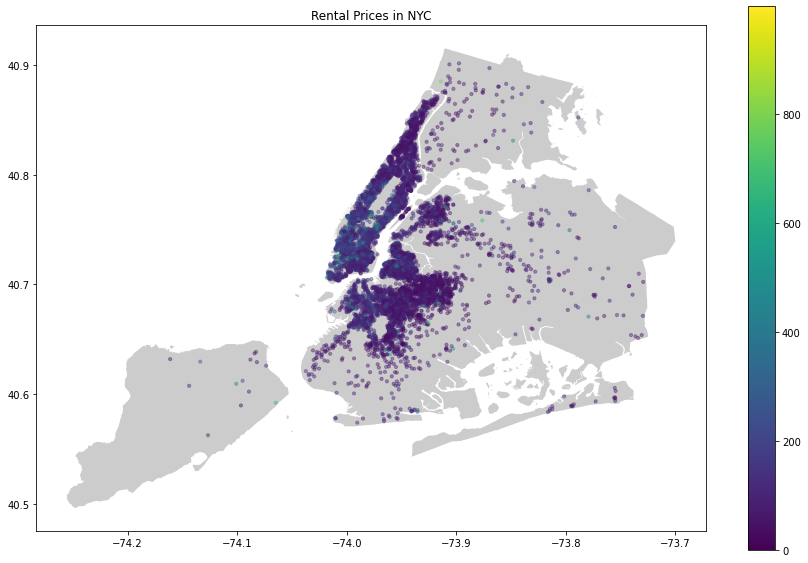

In [ ]:
street_map = gpd.read_file('/content/drive/MyDrive/Boundaries/Borough Boundaries.zip (Unzipped Files)/geo_export_dbd0e1ff-776d-4f46-9c1f-42844dbaa345.shp')
goemetry = [Point(xy) for xy in zip(closed_df['longitude'],closed_df['latitude'])]


geo_df = gpd.GeoDataFrame(closed_df,geometry = goemetry)

fig,ax = plt.subplots(figsize = (15,10))

street_map.plot(ax = ax ,alpha = 0.4,color='grey' )
geo_df.plot(column='price',ax = ax , alpha = 0.4 , legend = True , markersize = 10)
plt.title('Rental Prices in NYC')


Most of the listings are closed in manhatten and brroklyn may be because of the competetions are getting old.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


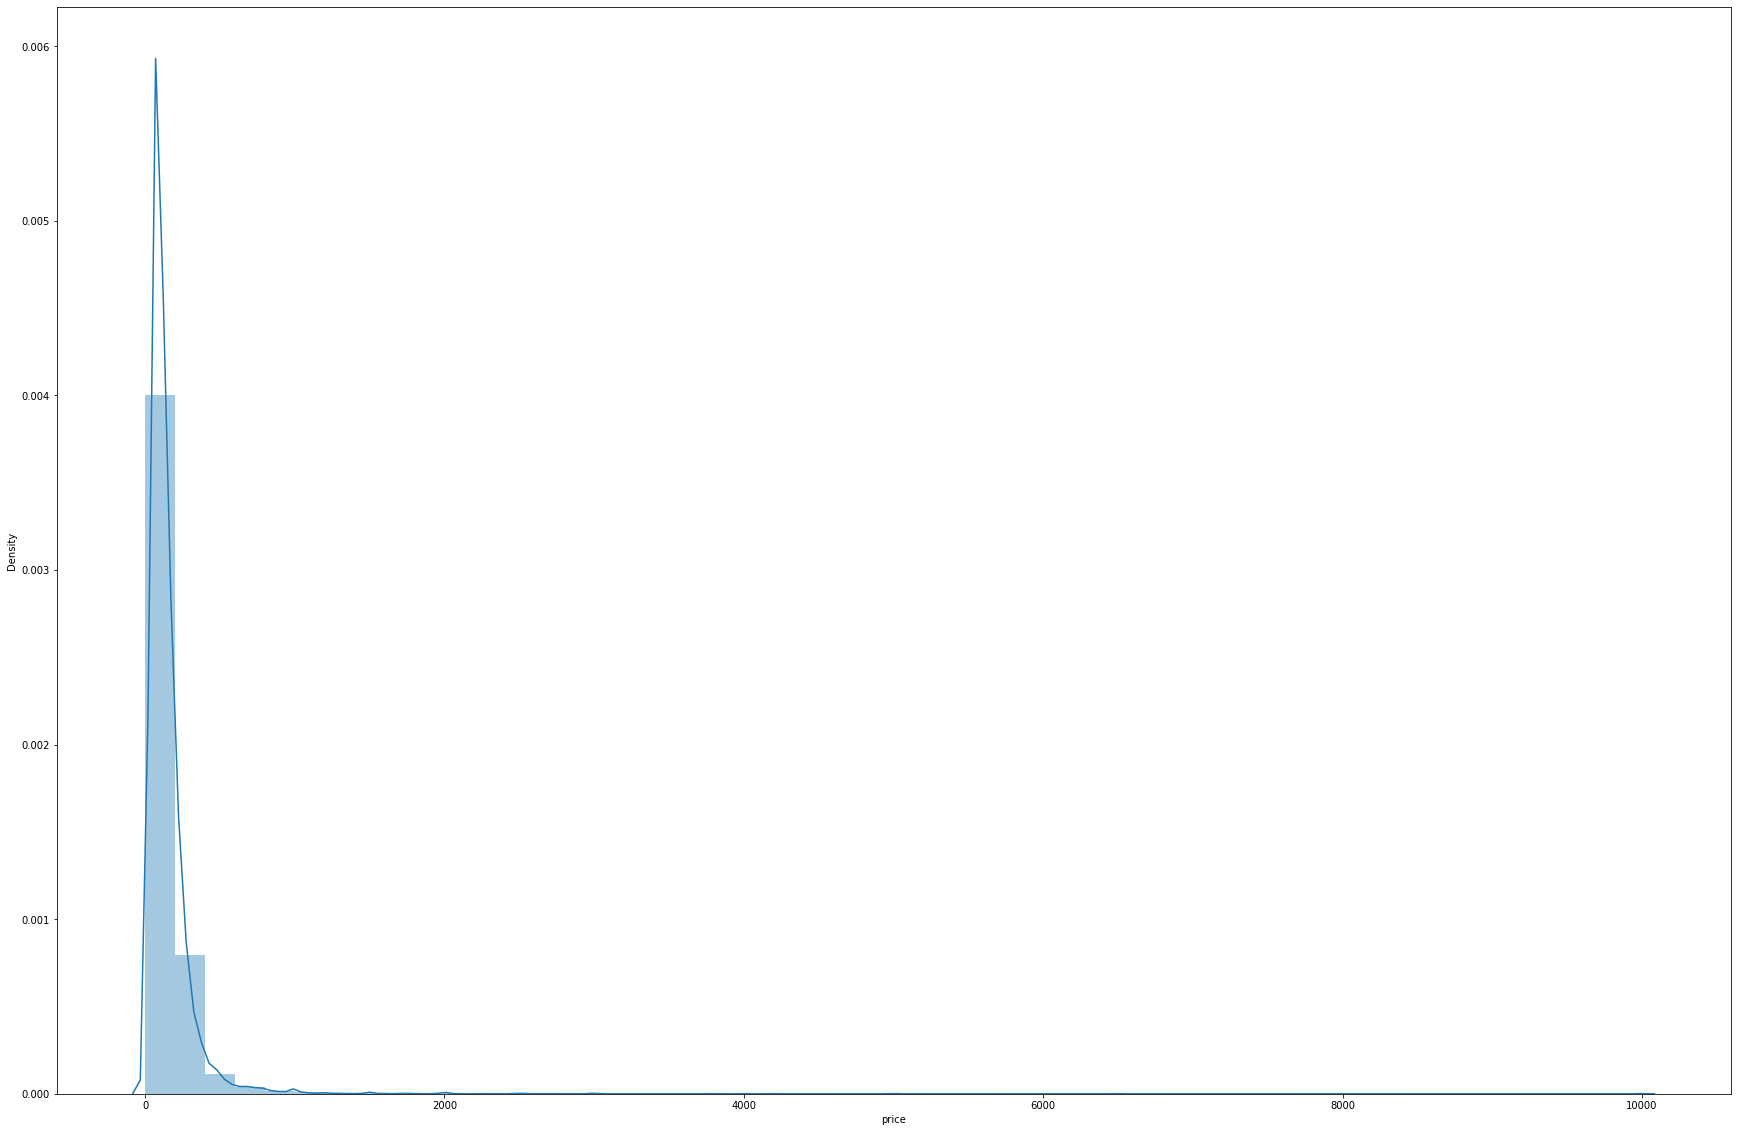

In [ ]:
sns.distplot(df['price'], hist=True)

In [ ]:
corr1 = neighbourhood_group_df['number_of_listings'].corr(neighbourhood_group_df['standard_deviation'],method='pearson')
print(corr1)
sns.lmplot(x='number_of_reviews', y='price', data= neighbourhood_df )

NameError: ignored

In [ ]:
sns.lmplot(x='number_of_reviews', y='price', data= df )

sns.lmplot(x='number_of_reviews', y='standard_deviation', data= neighbourhood_df )

In [ ]:
correlation_price_reviews = df.loc[:,['price','number_of_reviews']]
correlation_price_reviews.corr()

In [ ]:
neighbourhood_df = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
neighbourhood_df['number_of_listings'] = (df.groupby(['neighbourhood_group','neighbourhood'])['id'].count().reset_index())['id']
neighbourhood_df['number_of_reviews'] = (df.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().reset_index())['number_of_reviews']
neighbourhood_df['standard_deviation'] = (df.groupby(['neighbourhood_group','neighbourhood'])['price'].std().reset_index())['price']
neighbourhood_df

,neighbourhood_group,neighbourhood,price,number_of_listings,number_of_reviews,standard_deviation
0,Bronx,Allerton,87.595238,42,1803,73.048617
1,Bronx,Baychester,75.428571,7,310,17.415100
2,Bronx,Belmont,77.125000,24,296,68.949454
3,Bronx,Bronxdale,57.105263,19,458,20.283805
4,Bronx,Castle Hill,63.000000,9,118,33.462666
...,...,...,...,...,...,...
216,Staten Island,Tottenville,144.857143,7,139,98.311458
217,Staten Island,West Brighton,80.555556,18,656,47.689217
218,Staten Island,Westerleigh,71.500000,2,18,44.547727
219,Staten Island,Willowbrook,249.000000,1,9,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


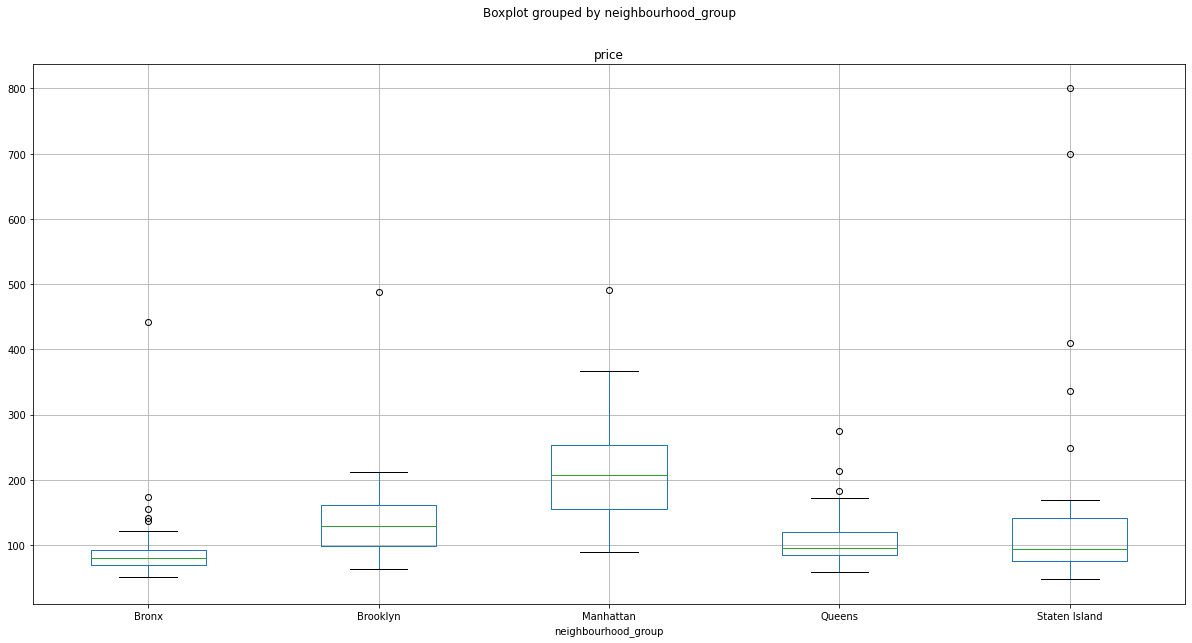

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
neighbourhood_df.boxplot(by = 'neighbourhood_group' , column='price')

In [ ]:
#hypothesis
#city price ---chittaranjan
#neighbourhood and price ---nurul
#room type and price---nurul
#price and number of reviews-- nurul
#minimum_nights and number_of_reviews --- chittaranjan
#host id reviews per month .....how busy a host is why....spread of price location , room type --- bhanu
#based on map  --- bhanu
#last_review to see the closed listings ---nirola
#text ----nirola

In [ ]:
import re

In [ ]:
filter(None,re.findall(r", -!?:]+", "nee_face@raa"))

In [ ]:
most_frequent_words = (list(words.keys()))[0:20]
most_frequent_words

['room',
 'private',
 'apt',
 'near',
 'bedroom',
 'manhattan',
 'cozy',
 'williamsburg',
 'apartment',
 'studio',
 'park',
 'east',
 'brooklyn',
 'jfk',
 'large',
 'home',
 'bed',
 'nyc',
 'central',
 'brownstone']